## Question 1 of 6
# Basic Questions for class (2)
Below is a short block of code describing a neural network using a python library called tensorflow.keras. Note, it takes a few minutes to run, so you might want to get it started now.



Create a prompt for the large language model of your choice that includes this code. Interview the model about the code until you're convinced you understand exactly how it works and what it's doing. Here are some things you'll need to know to be able to describe the network:

1. What data is it training on?
The model is training on the MNIST dataset, which consists of 60,000 training images and 10,000 validation images of handwritten digits. Each image is 28x28 pixels, grayscale, representing digits from 0 to 9.

2. What is it learning to do?
The model is learning to classify images of handwritten digits into one of 10 classes (digits 0-9). It aims to map each input image to the correct digit label.

3. How many layers does it have?
The model has four layers:

A Flatten layer.
Two Dense (fully connected) layers.
A final Dense output layer.
4. What is a layer?
A layer in a neural network is a collection of units (neurons) that apply transformations to the input data. Each layer receives input from the previous layer, applies computations (e.g., weighted sums, activations), and passes the output to the next layer.

5. How many units in the layers?
The first Dense layer has 128 units.
The second Dense layer has 64 units.
The output Dense layer has 10 units.
6. What is a unit?
A unit (or neuron) is a basic computational element in a layer. It takes inputs, multiplies them by weights, adds a bias, applies an activation function, and produces an output. The output is then passed to the next layer.

7. What are the units' activation functions?
The activation functions used are:

The sigmoid function for both the first and second Dense layers. It squashes the output to a range between 0 and 1.
The final layer has no activation function, meaning it outputs raw logits (real numbers) for each of the 10 classes.
8. How are the units connected to each other (i.e., how are the weights set initially?)
The units in each layer are fully connected to the units in the next layer. The weights between the layers are initialized using random values according to a default initializer (typically Glorot uniform initialization in Keras), which ensures the weights are small enough to allow effective training but not too small to prevent learning.

9. What is a connection weight?
A connection weight is a parameter that determines the strength of the connection between two units from adjacent layers. During training, these weights are updated based on how well the network is performing, helping the model learn the mapping from input to output.

10. What is the output?
The output is a vector of 10 logits (real numbers) from the final Dense layer, each corresponding to one of the digit classes (0-9). Each logit represents the unnormalized score for a particular class.

11. How well is it performing the classification?
The performance metric used is accuracy. However, the model uses binary cross-entropy loss, which is not appropriate for this multi-class classification task. Using categorical cross-entropy would be more suitable, and using binary cross-entropy might result in suboptimal performance.

## Question 2 of 6
Draw the network (you can draw each layer as a rectangle, you don't need to draw each unit), clearly label the connection, and write out the matrix multiplication that corresponds to doing a forward pass through the network. Upload this drawing in the file upload cell below.

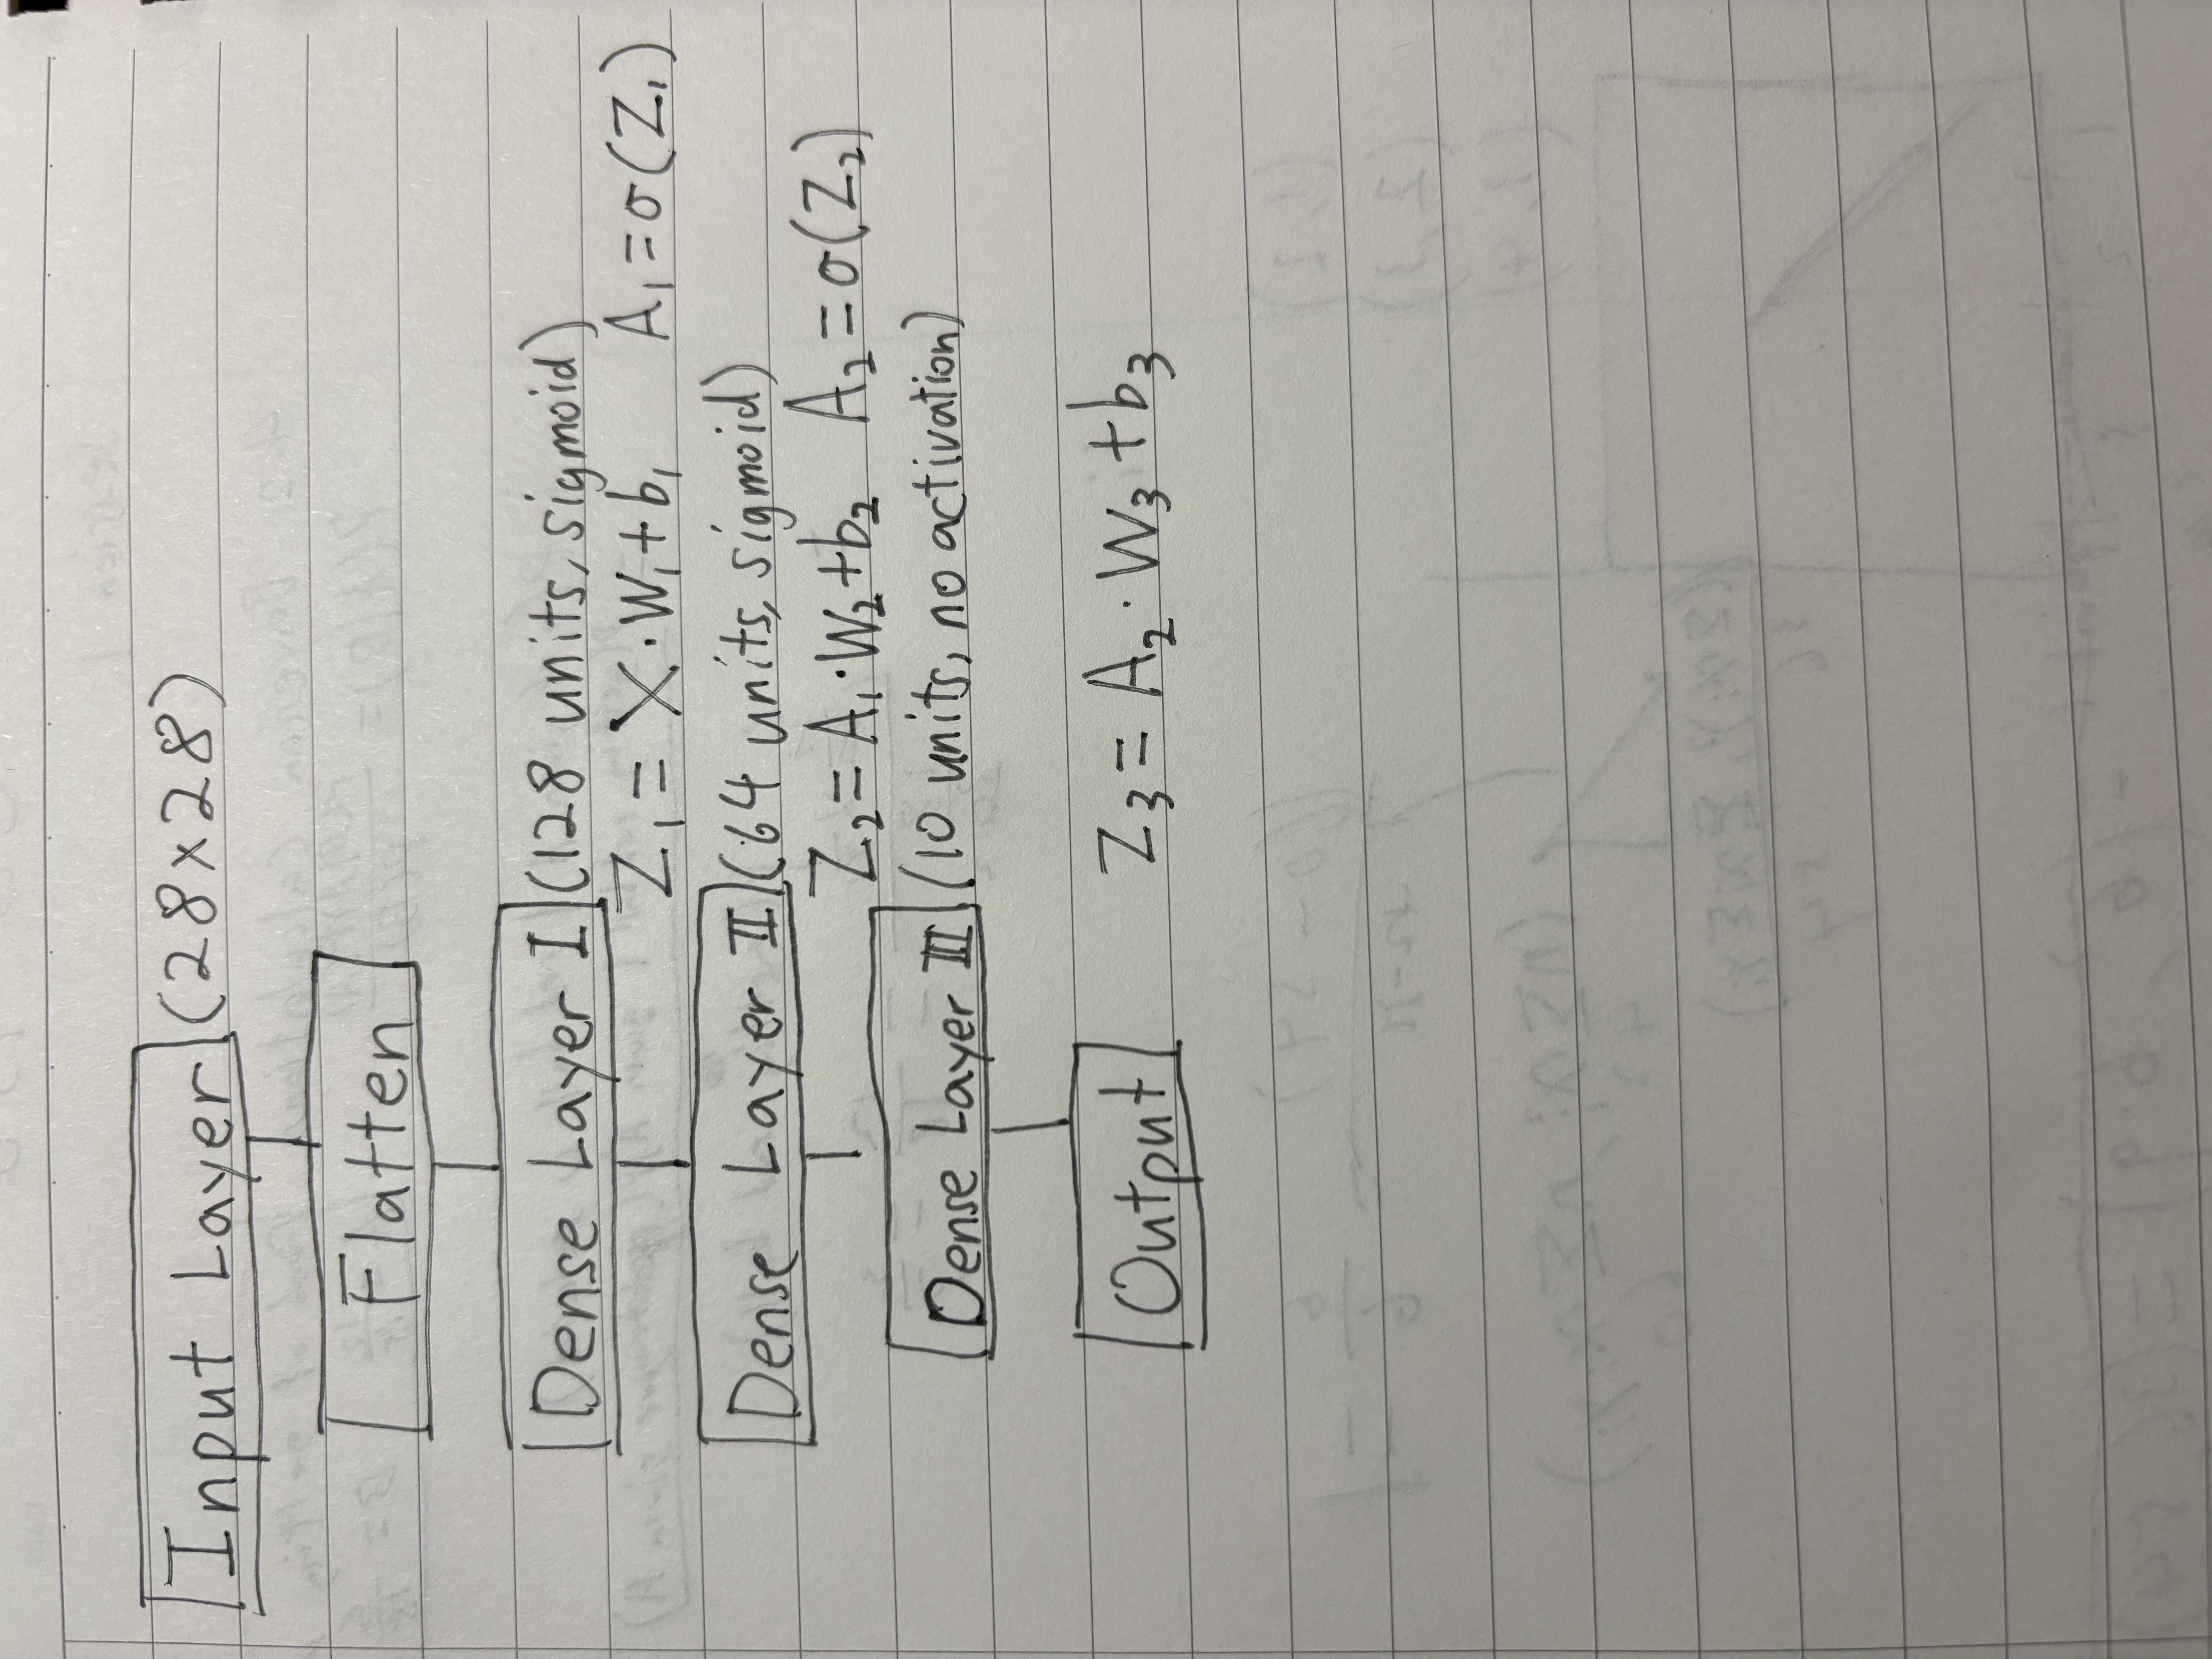

In [2]:
from IPython.display import Image, display

# Display the image
display(Image(filename='cs156_session7.jpeg'))

Variables:
- **$X$**: Input data (shape $[n \times 784]$, where $n$ is the batch size and 784 is the number of features after flattening the 28x28 image).
- **$W_1$**: Weights of the first Dense layer (shape $[784 \times 128]$).
- **$b_1$**: Bias of the first Dense layer (shape $[128]$).
- **$W_2$**: Weights of the second Dense layer (shape $[128 \times 64]$).
- **$b_2$**: Bias of the second Dense layer (shape $[64]$).
- **$W_3$**: Weights of the output Dense layer (shape $[64 \times 10]$).
- **$b_3$**: Bias of the output Dense layer (shape $[10]$).

### Step 1: First Dense Layer
$$
Z_1 = X \cdot W_1 + b_1
$$
Where:
- $Z_1$ is the result before activation (shape $[n \times 128]$).
- Apply sigmoid activation: 
$$ A_1 = \sigma(Z_1) $$

### Step 2: Second Dense Layer
$$
Z_2 = A_1 \cdot W_2 + b_2
$$
Where:
- $Z_2$ is the result before activation (shape $[n \times 64]$).
- Apply sigmoid activation: 
$$ A_2 = \sigma(Z_2) $$

### Step 3: Output Layer
$$
Z_3 = A_2 \cdot W_3 + b_3
$$
Where:
- $Z_3$ is the final logits (shape $[n \times 10]$), representing the raw class scores for each of the 10 classes.
- No activation function is applied at this step, so the output is a raw vector of logits.


## Question 3 of 6
# Core Questions (3)
Below is a longer block of code for writing a simple perceptron from scratch. 

Continue your discussion from the basic questions on this network. Describe the network that's being created. Be sure to include:

What is it learning to do?
How many layers does it have?
How many units in the layers?
What are the units activation functions?
How are the units connected to each other (i.e., how are the weights set initially?)
What is the output?
What do the functions predict() and train_weights() do?

## Perceptron Network: Discussion and Breakdown

## 1. What is it learning to do?
The Perceptron model is learning to perform **binary classification**. It is applied to the **Sonar dataset**, which contains sonar signals reflected from two types of objects (rocks or mines). The model aims to classify whether the sonar signals come from a **rock** or a **mine**.

## 2. How many layers does it have?
This is a **single-layer Perceptron**:
- It has an **input layer** and an **output layer** but **no hidden layers**.
- The input layer connects directly to the output layer.

## 3. How many units in the layers?
- **Input Layer**: There are **60 units** (since the dataset has 60 features per data instance).
- **Output Layer**: There is **1 unit** because this is a **binary classification** task.

## 4. What are the units' activation functions?
The activation function in a Perceptron is a **step function**:
\begin{cases} 
    1 & \text{if } x \geq 0 \\
    0 & \text{if } x < 0 
\end{cases}

The step function converts the weighted sum of inputs into a binary output.

## 5. How are the units connected to each other (i.e., how are the weights set initially)?
Each input unit is connected to the output unit through a **weight**. Initially, the weights are set to **zero**, and they are updated during training via **stochastic gradient descent**.

The weight update rule is:
$$
w_i = w_i + \\eta \\times \\text{error} \\times x_i
$$
Where:
- $w_i$ is the weight of the $i$-th input.
- $\\eta$ is the learning rate.
- **error** is the difference between the true output and the predicted output.
- $x_i$ is the value of the $i$-th input.

## 6. What is the output?
The output is a **binary classification**:
- **1** indicates a **mine**.
- **0** indicates a **rock**.

This binary output is determined by applying the step activation function to the weighted sum of the inputs.

## 7. What do the functions `predict()` and `train_weights()` do?

### Function: `predict()`
The `predict()` function:
- Takes a row of input data and the current weights.
- Computes the **weighted sum** (activation) of the inputs and weights, adding a bias term.
- Applies the **step function** to the weighted sum to make a prediction (either 0 or 1).

### Function: `train_weights()`
The `train_weights()` function:
- **Trains the model** using **stochastic gradient descent**.
- For each training instance, it:
  1. Calls `predict()` to make a prediction.
  2. Computes the **error** (actual class minus predicted class).
  3. Updates the weights based on the error, learning rate, and input values.
- This process is repeated for a specified number of **epochs**, allowing the model to refine the weights.


## Question 4 of 6
Draw the network (you can draw each layer as a rectangle, you don't need to draw each unit), clearly label the connection, and write out the matrix multiplication that corresponds to doing a forward pass through the network. Upload this drawing in the file upload cell below.



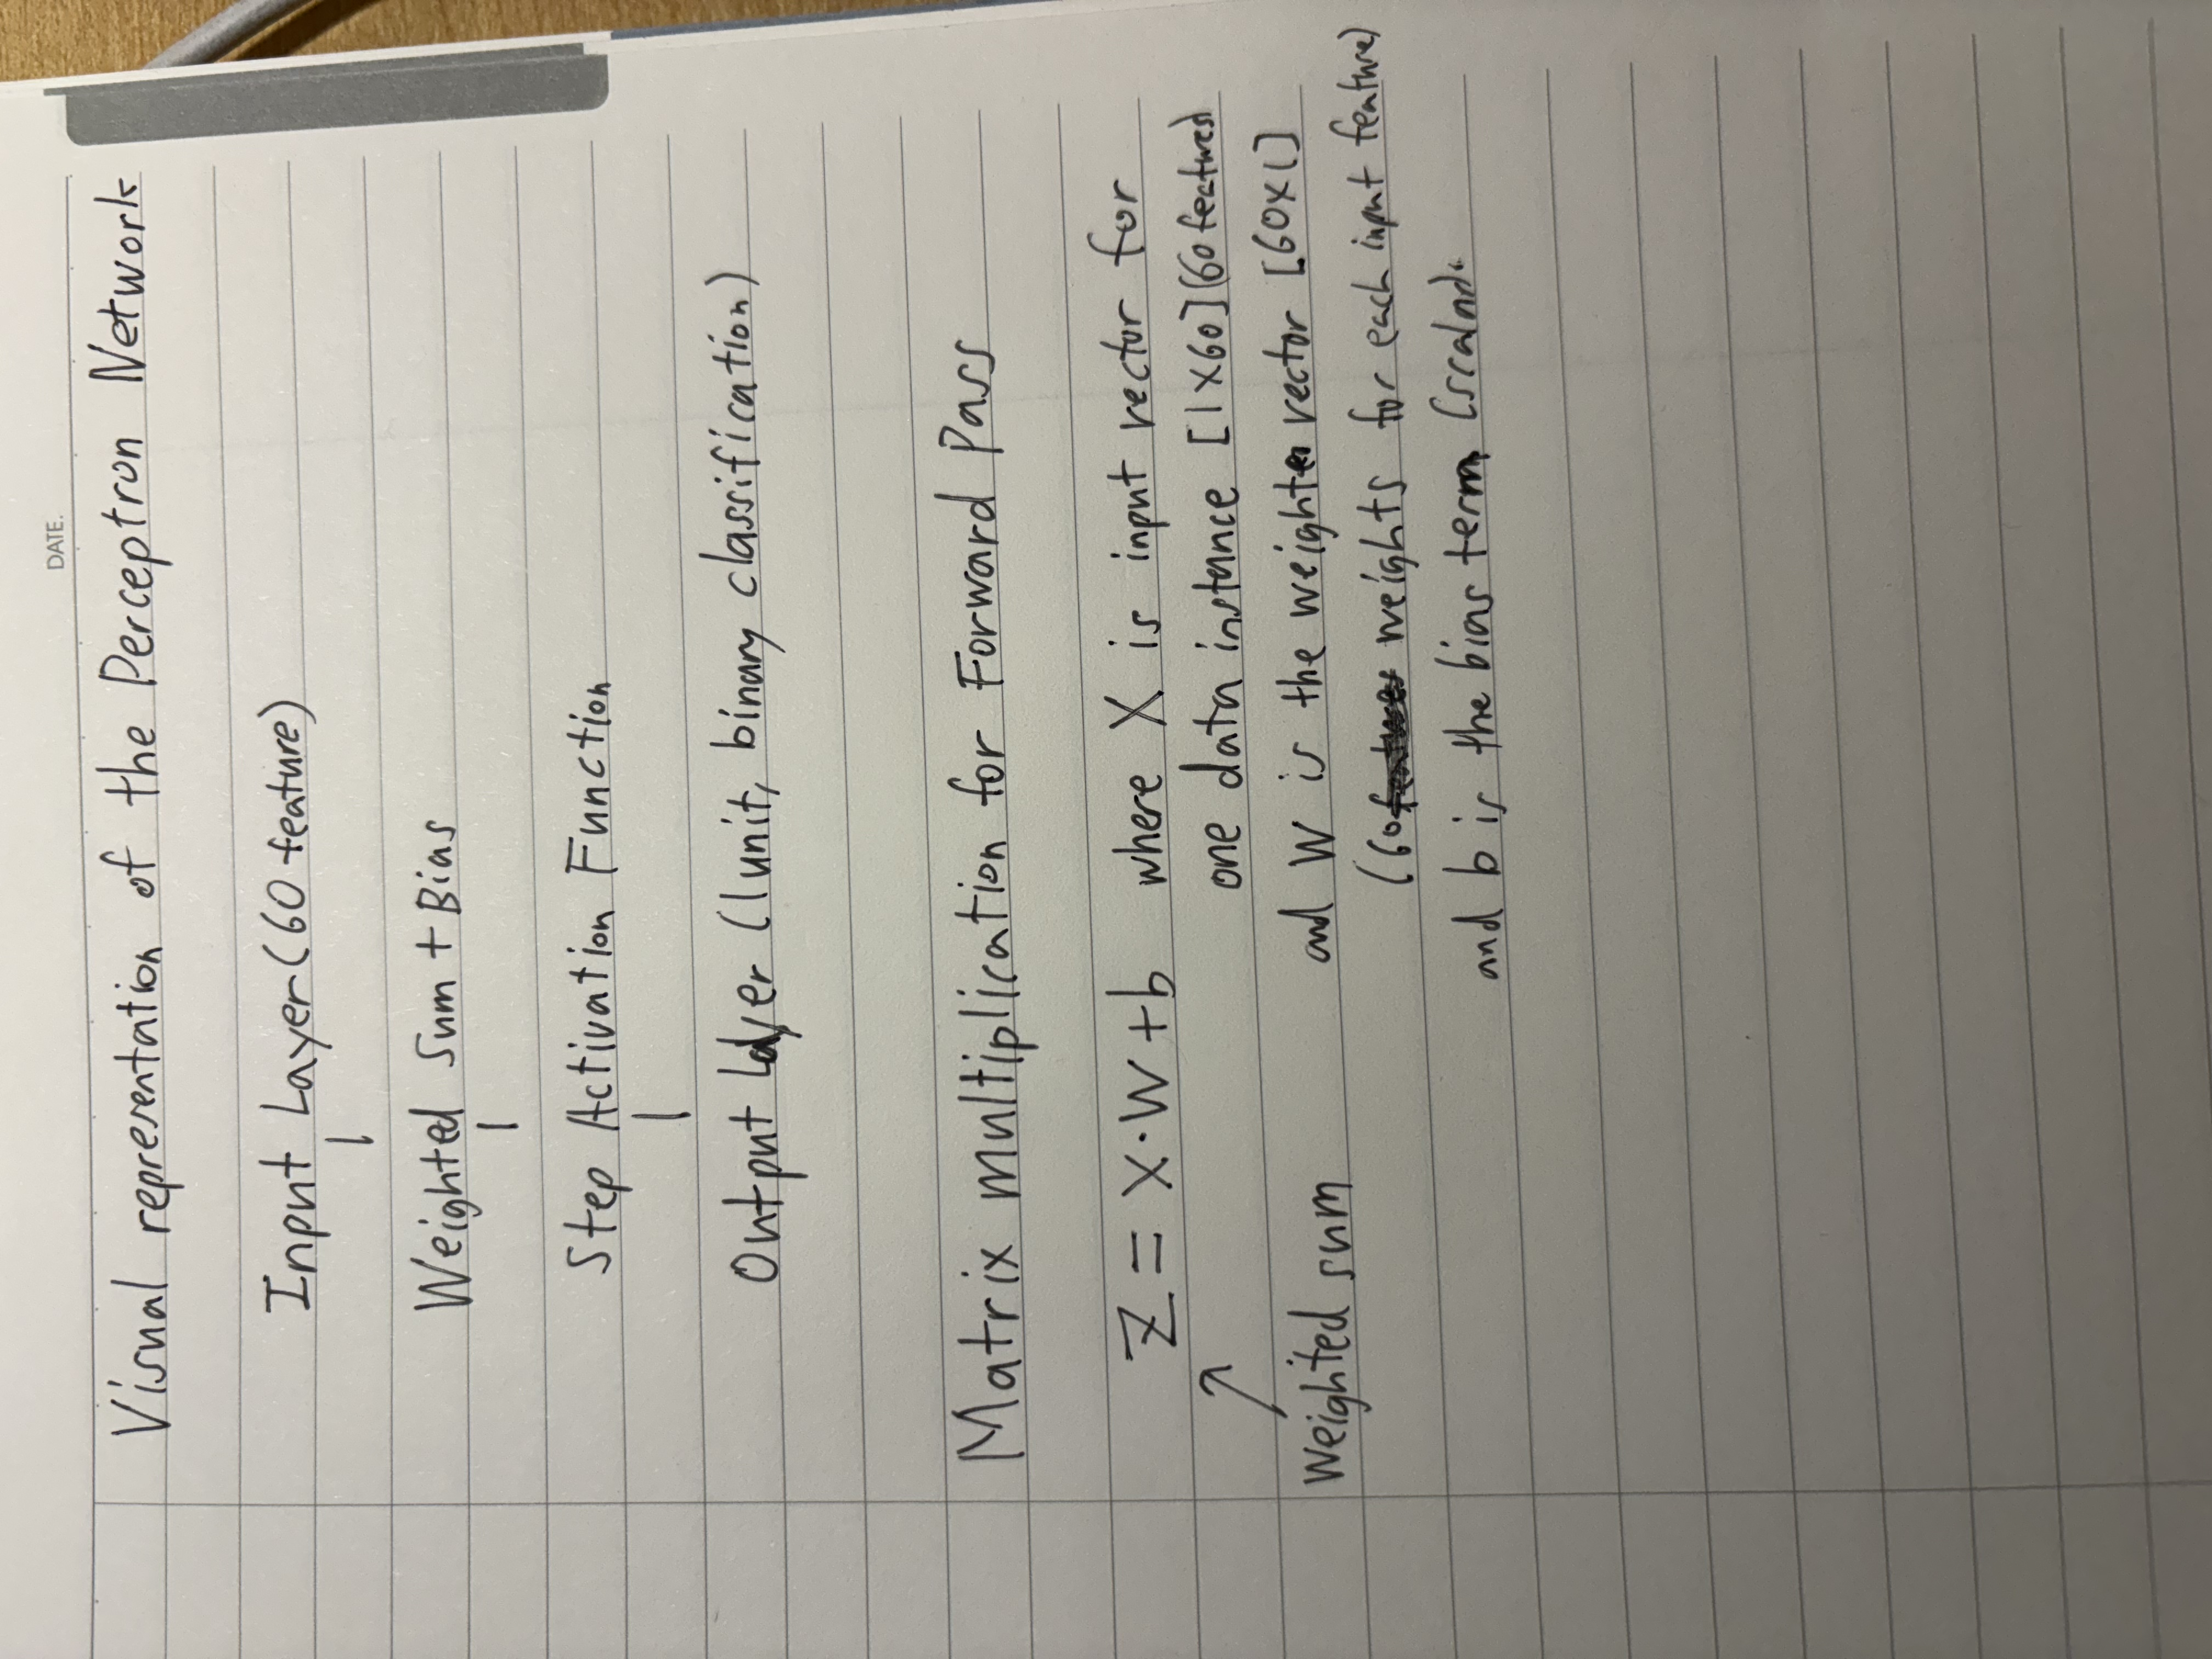

In [4]:
from IPython.display import Image, display

# Display the image
display(Image(filename='session7-2.jpeg'))

In [10]:
import numpy as np
import tensorflow as tf
from random import seed, randrange
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load Fashion MNIST dataset
def load_fashion_mnist():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    # Flatten the 28x28 images into 784-dimensional vectors
    x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32')
    x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32')
    # Normalize pixel values (0-255) to (0-1)
    x_train /= 255
    x_test /= 255
    return x_train, y_train, x_test, y_test

# Apply PCA to reduce dimensionality
def apply_pca(x_train, x_test, n_components=50):
    pca = PCA(n_components=n_components)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    return x_train_pca, x_test_pca

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross-validation split
def evaluate_algorithm(dataset, labels, algorithm, n_folds, *args):
    dataset = list(zip(dataset, labels))  # Combine dataset and labels
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    
    for i, fold in enumerate(folds):
        # Split the data into training and test sets
        train_set = [item for j, sublist in enumerate(folds) if j != i for item in sublist]
        test_set = fold

        # Train and test the model
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[1] for row in fold]  # Extract actual labels
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0][0]) + 1)]  # Initialize weights with bias term
    for epoch in range(n_epoch):
        for row in train:
            inputs = row[0]  # Extract input features
            prediction = predict(inputs, weights)
            error = row[1] - prediction
            weights[0] += l_rate * error  # Update bias term
            for i in range(len(inputs)):
                weights[i + 1] += l_rate * error * inputs[i]  # Update weights
    return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row[0], weights)  # row[0] contains features
        predictions.append(prediction)
    return predictions

# Main function to run the Perceptron algorithm on Fashion MNIST
seed(1)

# Load Fashion MNIST dataset
x_train, y_train, x_test, y_test = load_fashion_mnist()

# Reduce the dataset size for faster testing (e.g., only use 1000 samples)
x_train, y_train = x_train[:1000], y_train[:1000]
x_test, y_test = x_test[:1000], y_test[:1000]

# Apply PCA to reduce dimensionality to 50 principal components
x_train_pca, x_test_pca = apply_pca(x_train, x_test, n_components=50)

# We will perform binary classification by keeping only two classes (e.g., 0 = T-shirt, 1 = Trouser)
binary_train_indices = np.where((y_train == 0) | (y_train == 1))
binary_test_indices = np.where((y_test == 0) | (y_test == 1))
x_train_pca, y_train = x_train_pca[binary_train_indices], y_train[binary_train_indices]
x_test_pca, y_test = x_test_pca[binary_test_indices], y_test[binary_test_indices]

# Normalize the labels to 0 and 1 (for binary classification)
y_train = np.where(y_train == 0, 0, 1)
y_test = np.where(y_test == 0, 0, 1)

# Evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 100  # Reduce the number of epochs to 100 for faster performance
scores = evaluate_algorithm(x_train_pca, y_train, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


Scores: [95.71428571428572, 94.28571428571428, 97.14285714285714]
Mean Accuracy: 95.714%
